In [298]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [299]:
dataset = pd.read_excel('data_1.xlsx', sheet_name='data')

In [300]:
dataset

,BITS ID,Campus,Program Applied to,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,TOEFL Score,Universities Applied To,Universities (Admits),Universities (Funded admit),Did you choose to work for a few months/years before applying to graduate school?,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Was the above PS2/Thesis experience relevant to your application profile?,Internship other than PS1/PS2,Did you join any other classes/consultancy for your application process ?,Journal / Conference ( if your paper was published )
0,2015A7TS0081P,Pilani,MS,Computer Science,Artificial Intelligence/ Machine Learning,7.93,Arizona State University,154,170,4,105,"Arizona State University, Carnegie Melon Unive...",Arizona State University,NO,Yes,1.50,NaN,Singapore University of Tech and Design,Reinforcement Learning for path planning. Was ...,NO,Yes,NO,MDPI Applied Sciences
1,2012C6PSC6598P,Pilani,MS,Computer Science,NaN,6.7,Arizona State University,159,167,3.5,110,"Arizona State University, SUNY Buffalo, SUNY S...","Arizona State University, SUNY Buffalo",NO,Yes,1.50,CSIR- National Aerospace Laboratories,PS 2,Worked at Khosla labs,Yes,NO,NO,NO
2,2014A3PS224P,Pilani,MS,Mechanical Engineering,Robotics,7.78,Arizona State University,154,169,3.5,110,"Arizona State University, Georgia Tech, Johns ...","U Maryland, U Mich",NO,NO,0.00,NaN,Infinera,Hardware Testing,NO,NO,NO,NaN
3,2015A3PS0270P,Pilani,MS,Computer Science,NaN,7.98,Arizona State University,148,169,4,103,"Arizona State University, San Jose State Unive...","Arizona State University, SUNY Buffalo, U Flor...",NO,NO,0.50,NaN,NaN,NaN,Yes,NO,NO,NaN
4,2012B1A4761P,Pilani,PhD,BioEngineering,Tissue Engineering,8.4,Boston University,163,164,5,118,"Boston University, Georgia Tech, Harvard Unive...","Boston University, U Caifornia Irvine, Tufts U...",YES,Yes,1.50,NaN,Thesis - Harvard Medical School,"Design and development of cell phone enabled, ...",Yes,Yes,NO,"5 publications - ACS NaNO, Nature Communicatio..."
5,2012B1A4786P,Pilani,MS+PhD,Bioengineering,NaN,7.46,Boston University,155,163,4,116,"Boston University, Carnegie Melon University, ...","Boston University, TAMU, Tufts University, UC ...",NO,Yes,2.00,"CHAMBAL FERTILISERS AND CHEMICALS LIMITED, KOTA","Brigham and Women's Hospital, Harvard Medical ...",Developed and fabricated microfluidic models f...,Yes,NOne,NO,2 Indian patent applications in process
6,2011A7TS074P,Pilani,PhD,Computer Science,Artificial Intelligence/ Machine Learning,8.54,Carnegie Mellon,170,169,5,120,"Carnegie Melon University, Johns Hopkins Unive...","CMU, Johns Hopkins University",YES,NO,0.50,NaN,NaN,NaN,NaN,NaN,Yes,NaN
7,2015A2TS0550H,Hyderabad,MS,Civil Engineering,Transportation Engineering,9.03,Carnegie Mellon University,151,169,2.5,103,"Carnegie Melon University, TU Delft, U Mich, U...","CMU, TU Delft, U Mich",YES,NO,0.00,NaN,On campus thesis,NaN,Yes,Yes,Yes,NaN
8,2007B2A4655G,Goa,MS,Other,Public Policy,6.31,Carnegie Mellon University,165,167,4.5,114,"Carnegie Melon University, U Chicago","CMU, U Chicago",YES,Yes,2.00,Mphasis Ltd.\nTook 2 Recommendations from Work...,NaN,NaN,NO,NO,NO,NaN
9,2012A3PS259H,Hyderabad,MS,Mechanical Engineering,Robotics,8.46,Carnegie Mellon University,151,167,3,102,"Carnegie Melon University, TAMU, U California ...","CMU, U Penn, U Washington Seattle",NO,NO,0.00,NaN,"Tonbo Imaging, Bangalore",NaN,Yes,NO,NO,NOne


Shuffling dataframe to not be dependent on time based factors

In [301]:
#dataset.sample(frac=1).reset_index(drop=True, inplace=True)

In [302]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 23 columns):
BITS ID                                                                              1135 non-null object
Campus                                                                               1135 non-null object
Program Applied to                                                                   1135 non-null object
Target Discipline                                                                    1085 non-null object
Sub-Discipline                                                                       724 non-null object
CGPA                                                                                 1135 non-null object
University Selected                                                                  1012 non-null object
GRE Score : Verbal                                                                   1126 non-null object
GRE Score : Quant                             

Renaming few columns 

In [303]:
dataset.columns = (['BITS ID', 'Campus', 'Program Applied', 'Target Discipline',
       'Sub-Discipline', 'CGPA', 'University Selected', 'GRE Score : Verbal',
       'GRE Score : Quant', 'GRE Score : AWA', 'TOEFL Score',
       'Universities Applied', 'Universities Admit',
       'Universities (Funded admit)',
       'Work experience',
       'Duration of work experience', 'Work Experience details',
       'PS2/Thesis Organization', 'PS2/Thesis Details',
       'Relevance of PS2/Thesis to program',
       'Internship other than PS1/PS2',
       'Consultancy/Classes',
       'Conference publication'])

In [304]:
dataset.isnull().sum()

BITS ID                                 0
Campus                                  0
Program Applied                         0
Target Discipline                      50
Sub-Discipline                        411
CGPA                                    0
University Selected                   123
GRE Score : Verbal                      9
GRE Score : Quant                       7
GRE Score : AWA                        13
TOEFL Score                            33
Universities Applied                    1
Universities Admit                     21
Universities (Funded admit)             4
Work experience                        78
Duration of work experience             0
Work Experience details               628
PS2/Thesis Organization               155
PS2/Thesis Details                    599
Relevance of PS2/Thesis to program    124
Internship other than PS1/PS2         655
Consultancy/Classes                   266
Conference publication                960
dtype: int64

In [305]:
dataset[dataset['BITS ID'].isnull()]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,TOEFL Score,Universities Applied,Universities Admit,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication


In [306]:
dataset[dataset['CGPA'].isnull()]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,TOEFL Score,Universities Applied,Universities Admit,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication


All values are NANs for missing ID values, implying empty rows 

In [307]:
dataset.dropna(subset=['BITS ID','CGPA'], inplace=True)

Dealt with missing values in crucial field that werent supposed to be missing 

In [308]:
dataset.isnull().mean()*100

BITS ID                                0.000000
Campus                                 0.000000
Program Applied                        0.000000
Target Discipline                      4.405286
Sub-Discipline                        36.211454
CGPA                                   0.000000
University Selected                   10.837004
GRE Score : Verbal                     0.792952
GRE Score : Quant                      0.616740
GRE Score : AWA                        1.145374
TOEFL Score                            2.907489
Universities Applied                   0.088106
Universities Admit                     1.850220
Universities (Funded admit)            0.352423
Work experience                        6.872247
Duration of work experience            0.000000
Work Experience details               55.330396
PS2/Thesis Organization               13.656388
PS2/Thesis Details                    52.775330
Relevance of PS2/Thesis to program    10.925110
Internship other than PS1/PS2         57

Dealing with target discipline column

In [309]:
a = dataset[dataset['Target Discipline'].isnull()]
a

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,TOEFL Score,Universities Applied,Universities Admit,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
117,2015ABTS0796H,Hyderabad,MS,NaN,NaN,8.1,Pennsylvania State University,155,167,3.5,107,"Georgia Tech, Iowa State University, NOrth Car...","Iowa State University, NOrth Carolina State Un...",NO,NO,0.5,NaN,IIM Bangalore,SupplyChain Management,Yes,Yes,NaN,Production and Operations Management Society
505,2011ABPS521P,Pilani,MS,NaN,NaN,7.4,NOrthwestern University,161,169,3.5,111,"Arizona State University, Cornell University, ...","Arizona State University, Cornell University",NO,NO,0.0,NaN,NaN,NaN,NO,IIT Bombay,NO,NaN
1058,2007A7PS044P,Pilani,PhD,NaN,Systems and Networking,9.49,NaN,660,800,4,114,"CMU, MIT, Stanford, UCB, UIUC, UCSD, Princeton...","CMU (Ph.D, aided)\nUIUC (Ph.D, partially aided...",NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059,2008A1PS500G,Goa,MS,NaN,Aerospace Engineering,7.37,Penn State (NO Aid),650,800,4,115,"UMich, Georgia Tech, Virginia Tech, TAMU, UIUC...",Penn State (NO Aid),NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,2006B5A3657,Pilani,MS,NaN,"DSP, Digital Systems Design",8,"Maryland, PennState, TAMU, NCSU",157,164,3,103,"UCSD, Gatech, Maryland, PennState, TAMU, Purdu...","Maryland, PennState, TAMU, NCSU",NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,2006a4ps313p,Pilani,MS,NaN,Industrial engineering,9.53,Tamu-College station(aid NOt yet declared),720,710,4,96,Tamu-college station,Tamu-College station(aid NOt yet declared),NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,2006c6ps249p,Pilani,MS,NaN,Artificial Intelligence/ Machine Learning,9.26,Stanford\nETH Zurich\nUMass Amherst,730,730,3.5,114,Stanford\nETH Zurich\nUTA\nU Mass Amherst\nU M...,Stanford\nETH Zurich\nUMass Amherst,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1065,2006A8PS280,Pilani,MS,NaN,Digital IC Design,8.94,"Columbia, TAMU, Virginia Tech, UoMinnesota (al...",660,700,3,107,"UIUC, EPFL, Purdue, UT-Austin, Columbia, TAMU,...","Columbia, TAMU, Virginia Tech, UoMinnesota (al...",NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069,2007A7PS132,Pilani,PhD,NaN,Theoretical Science,9.35,MPI-SWS (Max Plank INstitute of Software Syste...,600,760,4,110,CMU (theory)\nPrinceton (theory)\nGaTech (theo...,MPI-SWS (Max Plank INstitute of Software Syste...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,2006A3PS172,Pilani,MS,NaN,Analog and Mixed Signal,9.07,Univ of Columbia,690,700,4,114,"Stanford, UCB,UCLA,Univ of Columbia, UT-Austin...",Univ of Columbia,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As subdiscipline values are not null for target discipline being null, we dont have to drop these rows. 

In [310]:
dataset['Target Discipline'] = dataset['Target Discipline'].str.strip()
dataset['Target Discipline'].unique()

array(['Computer Science', 'Mechanical Engineering', 'BioEngineering',
       'Bioengineering', 'Civil Engineering', 'Other',
       'Environmental Engineering',
       'Electrical and Electronics Engineering', 'Engineering Management',
       'Chemical Engineering', 'EcoNOmics', 'Physics',
       'Mathematics/Statistics', 'Biological Sciences', 'Finance', nan,
       'Computational Science', 'Business Analytics',
       'Pharmaceutical Sciences', 'Chemistry', 'Zoology', 'Management',
       'computer science', 'Engineering Technology', 'Biology',
       'Aerospace Engineering', 'Biological sciences'], dtype=object)

There are multiple duplicate categories to be dealt with. Eg. 'Computer science', 'computer science' are the same categories.

In [311]:
l = dataset[dataset.loc[:,'Target Discipline'] == 'computer science'].index 
dataset.loc[l,'Target Discipline'] = 'Computer Science'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Computational Science'].index
dataset.loc[l,'Target Discipline'] = 'Computer Science'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Biological sciences'].index 
dataset.loc[l,'Target Discipline'] = 'Biology'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Biological Sciences'].index
dataset.loc[l,'Target Discipline'] = 'Biology'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Zoology'].index
dataset.loc[l,'Target Discipline'] = 'Biology'
l = dataset[dataset.loc[:,'Target Discipline'] == ' Bioengineering'].index 
dataset.loc[l,'Target Discipline'] = 'Bioengineering'
l = dataset[dataset.loc[:,'Target Discipline'] == 'BioEngineering'].index 
dataset.loc[l,'Target Discipline'] = 'Bioengineering'
l = dataset[dataset.loc[:,'Target Discipline'] == 'EcoNOmics'].index
dataset.loc[l,'Target Discipline'] = 'Economics'











In [312]:
l = dataset[dataset['Target Discipline'].isnull() & dataset['Sub-Discipline'].isnull()].index
dataset.drop(l, inplace=True)

In [313]:
dataset['Target Discipline'].value_counts()

Computer Science                          423
Electrical and Electronics Engineering    221
Mechanical Engineering                    175
Chemical Engineering                       47
Civil Engineering                          42
Bioengineering                             23
Biology                                    22
Other                                      19
Mathematics/Statistics                     18
Business Analytics                         17
Pharmaceutical Sciences                    16
Physics                                    16
Finance                                    14
Environmental Engineering                  12
Engineering Management                      6
Management                                  5
Economics                                   5
Aerospace Engineering                       2
Engineering Technology                      1
Chemistry                                   1
Name: Target Discipline, dtype: int64

Merging related fields like Economics and Finance, Aerospace and mechanical. This step is performed to create a more balanced dataset

In [314]:
l = dataset[dataset.loc[:,'Target Discipline'] == 'Economics'].index
dataset.loc[l,'Target Discipline'] = 'Finance'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Engineering Management'].index 
dataset.loc[l,'Target Discipline'] = 'Management'
l = dataset[dataset.loc[:,'Target Discipline'] == 'Aerospace Engineering'].index 
dataset.loc[l,'Target Discipline'] = 'Mechanical Engineering'

Dealing with 'other' category 

In [315]:
dataset[dataset['Target Discipline'] == 'Other']['Sub-Discipline'].value_counts().index

Index(['Music techNOlogy', 'Public Policy', 'Public Policy ',
       'Computational Sciences', 'Media Arts and Sciences', 'UX Research'],
      dtype='object')

Accomodating them in current categories for Target variables if possible to prevent them acting as outliers

In [316]:
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Public Policy')].loc[:,'Target Discipline'].index 
dataset.at[l,'Target Discipline'] = 'Finance'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Public Policy ')].loc[:,'Target Discipline'].index
dataset.at[l,'Target Discipline'] = 'Finance'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Computational Sciences')].loc[:,'Target Discipline'].index
dataset.at[l,'Target Discipline'] = 'Computer Science'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='UX Research')].loc[:,'Target Discipline'].index
dataset.at[l,'Target Discipline'] = 'Computer Science'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Music techNOlogy')].loc[:,'Target Discipline'].index 
dataset.at[l,'Target Discipline']= 'Electrical and Electronics Engineering'

In [317]:
dataset[dataset.loc[:,'Target Discipline'] == 'Other']['Sub-Discipline']

35                         NaN
86     Media Arts and Sciences
551                        NaN
554                        NaN
555                        NaN
557                        NaN
565                        NaN
571                        NaN
599                        NaN
601                        NaN
602                        NaN
611                        NaN
628                        NaN
755                        NaN
Name: Sub-Discipline, dtype: object

Imputing Nan value in Target disiciple from Sub-Discipline

In [318]:
dataset['Target Discipline'].isnull().sum()

48

In [319]:
dataset[dataset.loc[:,'Target Discipline'].isnull()]['Sub-Discipline'].value_counts().index

Index(['VLSI', 'Construction Engineering and Management',
       'Artificial Intelligence/ Machine Learning', 'Systems and Networking',
       'Land use and transportation planning', 'MIS', 'Fracture Mechanics',
       'DataScience', 'Analog and Mixed Signal ', 'Industrial engineering',
       'Communications&Signal Processing', 'Aerospace Engineering',
       'Audio Engineering/Music TechNOlogy', 'Information Systems Management',
       'Distributed Systems', 'Networks and Distributed Systems',
       'Network Security', 'Developmental Biology', 'Database Systems',
       'Neuroscience', 'RF IC', 'Information Security', 'Design Engineering',
       'Management Science and Engineering', 'Cognitive Neuroscience',
       'Finance', 'Automobile ', 'environmental engineering',
       'Structural Health Monitoring and Structural Control',
       'Theoretical Science', 'Sustainable Systems',
       'Reversible logic, quantum computing, Communication Engineering',
       'Digital IC Design', 

dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')].fillna({'Target Discipline' : 'Civil Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Land use and transportation planning')].loc[:,'Target Discipline'] = dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Land use and transportation planning')].fillna({'Target Discipline' : 'Civil Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Developmental Biology')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Developmental Biology')].fillna({'Target Discipline' : 'Biology'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Materials and minerals; Process simulations')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Materials and minerals; Process simulations')].fillna({'Target Discipline' : 'Chemical Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'environmental engineering')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'environmental engineering')].fillna({'Target Discipline' : 'Environmental Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Finance')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Finance')].fillna({'Target Discipline' : 'Environmental Engineering'})


In [320]:
#dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')]= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')].fillna('Civil Engineering', inplace= True)
#dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')]


Removing Garbage values , with Nan in all columns

Defining functions for target disicipline with lots of subdisciplines

In [321]:
def mechanical(subdiscipline):
    l = dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.loc[l,'Target Discipline'] = 'Mechanical Engineering'

In [322]:
def computers(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.loc[l,'Target Discipline'] = 'Computer Science'

In [323]:
def electronics(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.at[l,'Target Discipline'] = 'Electrical and Electronics Engineering'

In [324]:
def biology(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.at[l,'Target Discipline'] = 'Biology'

In [325]:
def civil(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.at[l,'Target Discipline'] = 'Civil Engineering'

Defining lists for different subdisciplines related to a target discipline

In [326]:
lis_mech = ['Automobile ', 'Mechanical-Design and Manufacturing','Fracture Mechanics', 'Aerospace Engineering', 'Sustainable Systems', 'Industrial engineering','Design Engineering','mechanical'  ]
lis_comp= ['MIS','Systems and Networking','Storage Area Networks','Management Information Systems', 'DataScience','Artificial Intelligence/ Machine Learning','Distributed Systems','Networks and Distributed Systems','Information Systems Management','DSA and Networks','Network Security','Database Systems','Information Security']
lis_elec = ['Audio Engineering/Music TechNOlogy','RF IC','Analog and Mixed Signal ','Analog and Mixed Signal','VLSI','Mobile Communications','Communications&Signal Processing','Analog and Mixed Signal','DSP, Digital Systems Design','Power Electronics', 'Digital IC Design','Reversible logic, quantum computing, Communication Engineering','Design']
lis_bio = ['Developmental Biology','Neuroscience','Cognitive Neuroscience','Structural Health Monitoring and Structural Co...']
lis_civil = ['Construction Engineering and Management','Land use and transportation planning']

In [327]:
for i in lis_mech: 
    mechanical(i)
for i in lis_comp:
    computers(i)
for i in lis_elec:
    electronics(i)
for i in lis_bio:
    biology(i)
for i in lis_civil:
    civil(i)

In [328]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'environmental engineering')].index
dataset.at[l,'Target Discipline'] = 'Environmental Engineering'


In [329]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Theoretical Science')].index
dataset.at[l,'Target Discipline'] = 'Physics'

In [330]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Finance')].index
dataset.at[l,'Target Discipline'] = 'Finance'

In [331]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Materials and minerals; Process simulations')].index
dataset.at[l,'Target Discipline'] = 'Chemical Engineering'

In [332]:
l = dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Management Science and Engineering')].index
dataset.at[l,'Target Discipline'] = 'Management'

In [333]:
dataset[dataset['Target Discipline'].isna()]['Sub-Discipline']

1084    Structural Health Monitoring and Structural Co...
Name: Sub-Discipline, dtype: object

In [334]:
dataset.loc[1084,'Target Discipline'] = 'Biology'

Dealing with other categorical columns

"Work Experience"

In [335]:
dataset['Work experience'].unique()

array(['Yes', 'NO', nan], dtype=object)

In [336]:
l = dataset[dataset.loc[:,'Work experience']== 'yes'].loc[:,'Work experience'].index
dataset.at[l,'Work experience'] = 'Yes'
l = dataset[dataset.loc[:,'Work experience']== 'no'].loc[:,'Work experience'].index
dataset.at[l,'Work experience'] = 'NO'

Imputing missing values in this column as No

In [337]:
dataset['Work experience'].fillna('NO', inplace= True)    

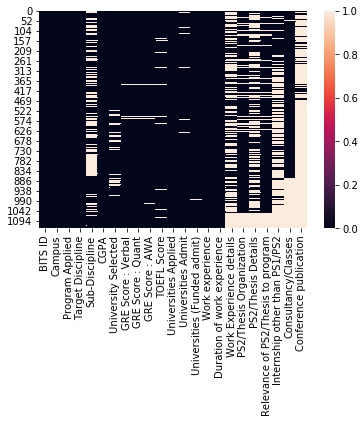

In [338]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(dataset.isnull())

In [339]:
dataset.drop(31, inplace= True)                            #dealing with random string values in CGPA column

In [340]:
dataset[dataset['CGPA'] > 9].loc[:,'GRE Score : Quant'].unique() 

array([169, 167, 170, 168, 166, 165,
       'NA (GRE NOt required for the application)', 163, nan, 162, 155,
       160, 164, 154, 111, 800, 710, 730, 760, 700, 720, 790, 770, 340,
       300, 600], dtype=object)

In [341]:
#dealing with random string values in GRE column
l = dataset[dataset['GRE Score : Verbal'] == 'NA (GRE NOt required for the application)'].index
dataset.drop(l,inplace= True)
dataset.loc[957, 'GRE Score : Verbal'] = 150

In [342]:
l = dataset[dataset['GRE Score : Verbal'] == 0].index
dataset.at[l,'GRE Score : Verbal'] = np.nan
l = dataset[dataset['GRE Score : Verbal'] == 'no'].index
dataset.at[l,'GRE Score : Verbal'] = np.nan
l = dataset[dataset['GRE Score : Quant'] == 'no'].index
dataset.at[l,'GRE Score : Quant'] = np.nan
l = dataset[dataset['GRE Score : Quant'] == 0].index
dataset.at[l,'GRE Score : Quant'] = np.nan

As visible the data consists of scores both in range 0-340(new format) and 0-1400(old) format. Therefore suitable conversion of the old scores to new scale is required

#### Defining dictionary for conversion based on conversion tables available online

In [343]:
#Quant conversion 
quant_dict = dict({800:166,790:164,780:163,770:161,760:160,750:159,745: 159 ,740:158,730:157,720:156,710:155,700:155,690:154,680:153,670:152,660:152,650:151,640:151,630:150,620:149,610:149,600:148,590:148,580:147,570:147,560:146,550:146,540:145,530:145,520:144,510:144,500:144,490:143,480:143,470:142,450:141 ,400:140,340:137, 322:137, 300:136 })
dataset.replace({"GRE Score : Quant": quant_dict}, inplace= True)
dataset['GRE Score : Quant'].unique()

array([170., 167., 169., 164., 163., 168., 166., 165., 161., 150., 162.,
       159.,  nan, 157.,  49., 160., 156.,  50., 151., 155., 154., 111.,
       158., 144., 137., 145., 148., 153., 152., 880., 140., 136., 149.])

In [344]:
#replacing outliers with nan
l = dataset[dataset['GRE Score : Quant'] == 880].index
dataset.at[l,'GRE Score : Quant'] = np.nan
l = dataset[dataset['GRE Score : Quant'] == 49].index
dataset.at[l,'GRE Score : Quant'] = np.nan
l = dataset[dataset['GRE Score : Quant'] == 50].index
dataset.at[l,'GRE Score : Quant'] = np.nan

In [345]:
dataset['GRE Score : Quant'].unique()

array([170., 167., 169., 164., 163., 168., 166., 165., 161., 150., 162.,
       159.,  nan, 157., 160., 156., 151., 155., 154., 111., 158., 144.,
       137., 145., 148., 153., 152., 140., 136., 149.])

In [346]:
dataset['GRE Score : Verbal'].unique()

array([154, 159, 148, 163, 155, 170, 151, 165, 157, 161, 158, 150, 167,
       160, 156, 168, 149, 153, 166, 164, 162, 152, 140, 147, 143, 145,
       144, 146, nan, 38, 169, 650, 430, 111, 490, 510, 530, 171, 331,
       670, 630, 580, 680, 610, 400, 640, 321, 570, 550, 590, 560, 322,
       420, 520, 460, 660, 780, 720, 730, 311, 600, 314, 800, 690, 323,
       332, 700, 313, 710, 740, 620, 320, 770, 315, 328, 309, 760, 745,
       326, 327, 319, 750, 304, 318], dtype=object)

In [347]:
# Verbal conversion 
verb_dict = dict({800:170,790:170,780:170,770:170,760:170,750:169,745: 169, 740:169,730:168,720:168,710:167,700:166,690:165,680:165,670:164,660:164,650:163,640:162,630:162,620:161,610:160,600:160,590:159,580:158,570:158,560:157,550:156,540:156,530:155,520:154,510:154,500:153,490:152,440:149,460:151,420:148,400:146,320:140, 315:139, 311: 139, 314: 139, 313: 139, 319: 139, 315: 139, 326: 141, 328: 141, 327: 141, 323: 140 , 322: 140,321: 140,430:149, 331: 141, 332: 141 , 309: 139, 304: 138, 318: 140 })
dataset.replace({"GRE Score : Verbal": verb_dict}, inplace= True)
dataset['GRE Score : Verbal'].unique()

array([154., 159., 148., 163., 155., 170., 151., 165., 157., 161., 158.,
       150., 167., 160., 156., 168., 149., 153., 166., 164., 162., 152.,
       140., 147., 143., 145., 144., 146.,  nan,  38., 169., 111., 171.,
       141., 139., 138.])

In [348]:
#replacing outliers with nan
l = dataset[dataset['GRE Score : Verbal'] == 38].index
dataset.at[l,'GRE Score : Verbal'] = np.nan
l = dataset[dataset['GRE Score : Verbal'] == 171].index
dataset.at[l,'GRE Score : Verbal'] = np.nan

In [349]:
dataset[dataset['GRE Score : Verbal'] == 111]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,TOEFL Score,Universities Applied,Universities Admit,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
552,3,Dubai,PhD,Civil Engineering,NaN,21,EPFL,111.0,111.0,5,111,"Brown University, Cornell University","ETH Zurich, Massachusetts Institute of TechNOlogy",NO,NO,0.0,NaN,NaN,NaN,NaN,NaN,NO,NaN


In [350]:
#dropping this particular outlier
l = dataset[dataset['GRE Score : Verbal'] == 111].index
dataset.drop(l, inplace= True)

Imputing values for GRE score based on mean of GRE scores of other candidates with similar cgpa 

In [351]:
dataset['CGPA'] = pd.to_numeric(dataset['CGPA'])
dataset['GRE Score : Quant'] = pd.to_numeric(dataset['GRE Score : Quant'])
cg9_verbal = dataset[dataset['CGPA'] >= 9].loc[:,'GRE Score : Verbal'].mean()
cg9_quant = dataset[dataset['CGPA'] >=9].loc[:,'GRE Score : Quant'].mean()
cg8_verbal = dataset[(dataset['CGPA'] >= 8) & (dataset['CGPA'] < 9)].loc[:,'GRE Score : Verbal'].mean()
cg8_quant = dataset[(dataset['CGPA'] >= 8) & (dataset['CGPA'] < 9)].loc[:,'GRE Score : Quant'].mean()
cg7_verbal = dataset[(dataset['CGPA'] >= 7) & (dataset['CGPA'] < 8)].loc[:,'GRE Score : Verbal'].mean()
cg7_quant = dataset[(dataset['CGPA'] >= 7) & (dataset['CGPA'] < 8)].loc[:,'GRE Score : Quant'].mean()
cg6_verbal = dataset[(dataset['CGPA'] >= 6) & (dataset['CGPA'] < 7)].loc[:,'GRE Score : Verbal'].mean()
cg6_quant = dataset[(dataset['CGPA'] >= 6) & (dataset['CGPA'] < 7)].loc[:,'GRE Score : Quant'].mean()
cg5_verbal = dataset[dataset['CGPA'] <6].loc[:,'GRE Score : Verbal'].mean()
cg5_quant = dataset[dataset['CGPA'] <6].loc[:,'GRE Score : Quant'].mean()

Setting values for quant

In [352]:
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] >= 9)].index
dataset.loc[l, 'GRE Score : Quant'] = cg9_quant
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] < 9) & (dataset['CGPA'] >= 8)  ].index
dataset.loc[l, 'GRE Score : Quant'] = cg8_quant
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] < 8) & (dataset['CGPA'] >= 7)  ].index
dataset.loc[l, 'GRE Score : Quant'] = cg7_quant
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] < 7) & (dataset['CGPA'] >= 6)  ].index
dataset.loc[l, 'GRE Score : Quant'] = cg6_quant
l = dataset[(dataset['GRE Score : Quant'].isnull()) & (dataset['CGPA'] < 6) ].index
dataset.loc[l, 'GRE Score : Quant'] = cg5_quant

Setting values for verbal

In [353]:
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] >= 9)].index
dataset.loc[l, 'GRE Score : Verbal'] = cg9_verbal
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] < 9) & (dataset['CGPA'] >= 8)  ].index
dataset.loc[l, 'GRE Score : Verbal'] = cg8_verbal
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] < 8) & (dataset['CGPA'] >= 7)  ].index
dataset.loc[l, 'GRE Score : Verbal'] = cg7_verbal
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] < 7) & (dataset['CGPA'] >= 6)  ].index
dataset.loc[l, 'GRE Score : Verbal'] = cg6_verbal
l = dataset[(dataset['GRE Score : Verbal'].isnull()) & (dataset['CGPA'] < 6) ].index
dataset.loc[l, 'GRE Score : Verbal'] = cg5_verbal

GRE: AWA

In [354]:
dataset['GRE Score : AWA'].unique()

array([4, 3.5, 5, 2.5, 4.5, 3, 315, 5.5, nan, 0, 3.4, 329, 313, 6, 3.6,
       'no', 2], dtype=object)

In [355]:
l = dataset[dataset['GRE Score : AWA'] == 'no'].index
dataset.at[l,'GRE Score : AWA'] = np.nan
l = dataset[dataset['GRE Score : AWA']> 300].index
dataset.at[l,'GRE Score : AWA'] = np.nan
l = dataset[dataset['GRE Score : AWA'] == 0].index
dataset.at[l,'GRE Score : AWA'] = np.nan

In [356]:
dataset[(dataset['GRE Score : AWA'].isnull())]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,TOEFL Score,Universities Applied,Universities Admit,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
83,2015A1PS0734G,Goa,MS,Civil Engineering,Water Resources Engineering,8.37,KU Leuven,149.000000,166.000000,NaN,111,"ETH Zurich, TU Delft, KTH Royal Institute of T...","TU Delft, Wageningen, KU Leuven, KTH",NO,Yes,0.0,NaN,NUS,NaN,Yes,NO,Yes,"Electrochemical Society Transactions, Environm..."
208,2011B2PS759P,Pilani,MS,Computer Science,Data Science,6.70,University of Cincinnati,155.436975,165.907563,NaN,105,"Massachusetts Institute of TechNOlogy, Purdue ...","Purdue University, Rochester Institute of Tech...",NO,NO,0.5,NaN,Flipkart,NaN,Yes,NO,NO,NaN
252,2011A7PS317P,Pilani,MS,Computer Science,Artificial Intelligence/ Machine Learning,9.25,University of Oxford,157.388664,166.544715,NaN,108,"U College London, U Edinburgh, University of O...","U College London, U Edinburgh, University of O...",NO,Yes,2.5,IBM Research,Flipkart Internet Pvt. Ltd.,NaN,Yes,NaN,NO,http://ieeexplore.ieee.org/document/7877283/
387,2005A8PS267G,Goa,MS,Mathematics/Statistics,Applied Stochastic and Statistics,7.79,"NTNU NOrway, Chalmers Sweden",155.456592,165.375000,NaN,NaN,"NOrdic Five Tech Team, Maastricht University N...",Maastricht University (NO scholarship offered)...,yes,Yes,5.0,BHEL at Power Sector Marketing\n\nI was workin...,"Tenisilica, Pune",Something related to microprocessor programming.,NO,NaN,"Yes, but they were NOt much beneficial",NOne
404,2008B2A3553G,Goa,MS,Computer Science,NaN,7.22,UFL,152.000000,164.000000,NaN,109,NCSU;ASU;CMU;CUboulder;Columbia;UFL,1,NO,Yes,5.0,NaN,NaN,NaN,NaN,NaN,"Yes, but they were NOt much beneficial",NaN
436,2012A8TS297P,Pilani,MS,Electrical and Electronics Engineering,Music techNOlogy,6.47,Georgia Tech,163.000000,165.000000,NaN,NaN,Georgia Tech,Georgia Tech,NO,NO,0.5,NaN,Georgia Tech,Music Structure Analysis using rhythm features...,Yes,"JSW Cement, Nandyal",NO,NOne
453,2011B1A8688G,Goa,MS,Computer Science,Information Systems Management,7.00,"University of Maryland, College Park",155.000000,167.000000,NaN,109,"Carnegie Mellon University, Heinz College; Uni...","Carnegie Mellon University, MSITM; University ...",NO,NO,0.5,NaN,"Sellerworx, Bangalore",NaN,Yes,"Indian Institute of Science, Bangalore",NO,0
464,2014A0PS360G,Goa,MS,Chemical Engineering,NaN,0.00,NOne,160.000000,166.230769,NaN,108,All,XYZ,NO,NO,0.0,NaN,NaN,NaN,NaN,NaN,NO,0
466,2009A8PS363G,Goa,MS,Computer Science,NaN,5.96,"George Washington University, Washington DC",160.000000,165.000000,NaN,115,"George Washington University, Washington DC","George Washington University, Washington DC",NO,Yes,5.0,NaN,NaN,NaN,NaN,NaN,"Yes, they were worth the fees.",NaN
546,2008A3PS252H,Hyderabad,MS,Computer Science,NaN,7.20,NaN,162.000000,167.000000,NaN,116,"Ohio State University, SUNY Buffalo, TAMU, U F...","SUNY Buffalo, U Florida",NO,Yes,3.0,Software engineer,NaN,NaN,NaN,NaN,NO,NaN


Imputing null values 

In [357]:
dataset['GRE Score : AWA'] = pd.to_numeric(dataset['GRE Score : AWA'])
cg9_awa = dataset[dataset['CGPA'] >= 9].loc[:,'GRE Score : AWA'].mean()
cg8_awa = dataset[(dataset['CGPA'] >= 8) & (dataset['CGPA'] < 9)].loc[:,'GRE Score : AWA'].mean()
cg7_awa = dataset[(dataset['CGPA'] >= 7) & (dataset['CGPA'] < 8)].loc[:,'GRE Score : AWA'].mean()
cg6_awa = dataset[(dataset['CGPA'] >= 6) & (dataset['CGPA'] < 7)].loc[:,'GRE Score : AWA'].mean()
cg5_awa = dataset[dataset['CGPA'] <6].loc[:,'GRE Score : AWA'].mean()

In [358]:
l = dataset[(dataset['GRE Score : AWA'].isnull()) & (dataset['CGPA'] >= 9)].index
dataset.loc[l, 'GRE Score : AWA'] = cg9_awa
l = dataset[(dataset['GRE Score : AWA'].isnull()) & (dataset['CGPA'] < 9) & (dataset['CGPA'] >= 8)  ].index
dataset.loc[l, 'GRE Score : AWA'] = cg8_awa
l = dataset[(dataset['GRE Score : AWA'].isnull()) & (dataset['CGPA'] < 8) & (dataset['CGPA'] >= 7)  ].index
dataset.loc[l, 'GRE Score : AWA'] = cg7_awa
l = dataset[(dataset['GRE Score : AWA'].isnull()) & (dataset['CGPA'] < 7) & (dataset['CGPA'] >= 6)  ].index
dataset.loc[l, 'GRE Score : AWA'] = cg6_awa
l = dataset[(dataset['GRE Score : AWA'].isnull()) & (dataset['CGPA'] < 6) ].index
dataset.loc[l, 'GRE Score : AWA'] = cg5_awa

Dealing with campus category

In [359]:
dataset['Campus'] =  dataset['Campus'].str.lower()
dataset['Campus'] = dataset['Campus'].str.strip()
dataset['Campus'].unique()

array(['pilani', 'hyderabad', 'goa', 'dubai'], dtype=object)

Dealing with Program applied category 

In [360]:
dataset['Program Applied'] = dataset['Program Applied'].str.replace(" ", "")
dataset['Program Applied'].unique()

array(['MS', 'PhD', 'MS+PhD', 'MEM', 'M.Engg'], dtype=object)

In [361]:
# Merging MEM and MEngg to MS
l = dataset[dataset['Program Applied'] == 'M.Engg'].index
dataset.loc[l,'Program Applied'] = 'MS'
l = dataset[dataset['Program Applied'] == 'MEM'].index
dataset.loc[l,'Program Applied'] = 'MS'

Dealing with consultancy category 

In [362]:
dataset['Consultancy/Classes'].unique()

array(['NO', 'Yes', nan, 'Yes, but they were NOt much beneficial',
       'Yes, they were worth the fees.',
       'USIEF - United States India Education Foundation. This organisation is funded by US govt.'],
      dtype=object)

In [363]:
dataset['Consultancy/Classes'].fillna('NO', inplace= True)
l = dataset[dataset['Consultancy/Classes'] != 'NO'].index
dataset.loc[l,'Consultancy/Classes'] = 'Yes'
dataset['Consultancy/Classes'].unique()

array(['NO', 'Yes'], dtype=object)

Dealing with Relevance to PS2

In [364]:
dataset['Relevance of PS2/Thesis to program'].fillna('NO', inplace= True)
dataset['Relevance of PS2/Thesis to program'].unique()

array(['NO', 'Yes'], dtype=object)

Dealing with duration work experience

In [365]:
dataset[dataset['Duration of work experience'].isnull()]
# All null values have NO in the Work experience columns

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,TOEFL Score,Universities Applied,Universities Admit,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication


In [366]:
# Imputing zeros to nan 
dataset['Duration of work experience'].fillna(0, inplace= True)

Dealing with TOEFL scores 

In [367]:
dataset['TOEFL Score'].unique()

array([105, 110, 103, 118, 116, 120, 114, 102, 107, 108, 112, 111, 115,
       119, nan, 117, 113, 106, 109, 99, 98, 96, 100, 104, 94,
       'IELTS band 8.0', 97, 'Na', 92, 101, 'na', 95, 1.6, 85, 88, 93,
       1460, 'IELTS-7.5', '108/120'], dtype=object)

In [368]:
# imputing Nan for non numeric 
l = dataset[(dataset['TOEFL Score'] == 'IELTS band 8.0') | (dataset['TOEFL Score'] == 'Na') | (dataset['TOEFL Score'] == 'IELTS-7.5')| (dataset['TOEFL Score'] == 1460) | (dataset['TOEFL Score'] == 'na')| (dataset['TOEFL Score'] == 0) | (dataset['TOEFL Score'] == 280)].index
dataset.loc[l,'TOEFL Score'] = np.nan
l = dataset[(dataset['TOEFL Score'] == '108/120')].index
dataset.loc[l,'TOEFL Score'] = 108
l = dataset[(dataset['TOEFL Score'] == 1.6)].index
dataset.loc[l,'TOEFL Score'] = np.nan

In [369]:
dataset['TOEFL Score'].isnull().sum()

43

Imputing TOEFL score based on CGPA

In [370]:
cg9_toe = dataset[dataset['CGPA'] >= 9].loc[:,'TOEFL Score'].mean()
cg8_toe = dataset[(dataset['CGPA'] >= 8) & (dataset['CGPA'] < 9)].loc[:,'TOEFL Score'].mean()
cg7_toe = dataset[(dataset['CGPA'] >= 7) & (dataset['CGPA'] < 8)].loc[:,'TOEFL Score'].mean()
cg6_toe = dataset[(dataset['CGPA'] >= 6) & (dataset['CGPA'] < 7)].loc[:,'TOEFL Score'].mean()
cg5_toe = dataset[dataset['CGPA'] <6].loc[:,'TOEFL Score'].mean()

In [371]:
l = dataset[(dataset['TOEFL Score'].isnull()) & (dataset['CGPA'] >= 9)].index
dataset.loc[l, 'TOEFL Score'] = cg9_toe
l = dataset[(dataset['TOEFL Score'].isnull()) & (dataset['CGPA'] < 9) & (dataset['CGPA'] >= 8)].index
dataset.loc[l, 'TOEFL Score'] = cg8_toe
l = dataset[(dataset['TOEFL Score'].isnull()) & (dataset['CGPA'] < 8) & (dataset['CGPA'] >= 7)].index
dataset.loc[l, 'TOEFL Score'] = cg7_toe
l = dataset[(dataset['TOEFL Score'].isnull()) & (dataset['CGPA'] < 7) & (dataset['CGPA'] >= 6)].index
dataset.loc[l, 'TOEFL Score'] = cg6_toe
l = dataset[(dataset['TOEFL Score'].isnull()) & (dataset['CGPA'] < 6) ].index
dataset.loc[l, 'TOEFL Score'] = cg5_toe

In [372]:
dataset[dataset['TOEFL Score'].isnull()]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,TOEFL Score,Universities Applied,Universities Admit,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication


Dealing with Target Values

In [373]:
import re 

Imputing missing values for university selected from admit data 

In [374]:
l = dataset[(dataset['University Selected'].isnull()) & (dataset['Universities Admit'].notnull())].index
dataset.loc[l,'University Selected'] = dataset.loc[l,'Universities Admit'].str.split(',')

In [375]:
dataset['Conference publication'].unique()

array(['MDPI Applied Sciences', 'NO', nan,
       '5 publications - ACS NaNO, Nature Communications, NaNOscale, Advanced Functional Materials, Biosensors and Bioelectronics',
       '2 Indian patent applications in process', 'NOne',
       '1 B conference Networking paper',
       'CHI (Conference on Computer Human Interaction), SUI (Spatial User Interaction)',
       'Journal of Internet Banking and Commerce',
       '1 ASME international conference pub',
       "IEEE SOCA '17, ACM CoDS-COMAD '19", 'EMNLP 2018',
       'International Conference on Learning Representations (ICLR)',
       'IJRR 2019 Journal Paper', 'Francis and Taylor, Acs naNO',
       'ACS NaNO, and Taylor & Francis', '-',
       'IEEE/ACM/EDAC Design Automation Conference, June 2018',
       '2 papers at Indian Institute of Management, Bangalore',
       'International Joint Conference on Neural Networks',
       'VISIGRAPP 2019. VINCI 2018. Premi 2017',
       '7 (3 journals and 4 confs, all international) ',
     

In [376]:
l= dataset[dataset['Conference publication'] == np.nan].index
dataset.loc[l,'Conference publication'] = 'NO'
l= dataset[dataset['Conference publication'] == 'NOne'].index
dataset.loc[l,'Conference publication'] = 'NO'
l= dataset[dataset['Conference publication'] == 'noneyet'].index
dataset.loc[l,'Conference publication'] = 'NO'
dataset['Conference publication'].fillna('NO', inplace= True)
l = dataset[dataset['Conference publication'] != 'NO'].index
dataset.loc[l,'Conference publication'] = 'Yes'

In [377]:
dataset['University Selected'] = dataset['University Selected'].str.lower() #lowercasing
dataset['University Selected'] = dataset['University Selected'].str.replace(',',"") #removing commas
dataset['University Selected'] = dataset['University Selected'].str.replace('-',"") # 
dataset['University Selected'] = dataset['University Selected'].str.replace('@',"")
dataset['University Selected'] = dataset['University Selected'].str.replace(';',"")
dataset['University Selected'] = dataset['University Selected'].str.replace(':',"")

In [378]:
replacements = {'u':'', 
                'ut':'', 'at': '','university' :'','of' : '', 'the': '', 'univ': '' }

def replace(match):
    return replacements[match.group(0)]

for i in dataset.index:
    dataset.loc[i, 'University Selected'] = str(dataset.loc[i, 'University Selected'])
    dataset.loc[i,'University Selected'] =  re.sub('|'.join(r'\b%s\b' % re.escape(s) for s in replacements), 
        replace, dataset.loc[i,'University Selected']) 

In [379]:
#removing text enclosed in parantheses
import re
for i in dataset.index:
    dataset.loc[i, 'University Selected'] = re.sub("[\(\[].*?[\)\]]", "", dataset.loc[i,'University Selected'])


In [380]:
dataset['University Selected']= dataset['University Selected'].str.strip() #removing spaces from start and front

In [381]:
dataset['University Selected'].nunique()

319

In [382]:
#dealing with entries with multiple university names
for i in dataset.index:
    dataset.loc[i,'University Selected']= dataset.loc[i,'University Selected'].split('\n')[0]  #keeping the first uni name

In [383]:
# All the universities can be identified by the first two words in their names after removing common words
words = []
s = ''
for i in dataset.index:
        words.append(dataset.loc[i, 'University Selected'].split()[:2])
        dataset.loc[i, 'University Selected'] = "\n".join(["".join(x) for x in words])
        words = []

In [384]:
dataset['University Selected'].nunique()


257

In [385]:
from collections import Counter
from math import sqrt

In [386]:
def word2vec(word):
    # Count the number of characters in each word.
    count_characters = Counter(word)
    # Gets the set of characters and calculates the "length" of the vector.
    set_characters = set(count_characters)
    length = sqrt(sum(c*c for c in count_characters.values()))
    return count_characters, set_characters, length, word

In [387]:
def cosine_similarity(vector1, vector2, ndigits):
    
    # Get the common characters between the two character sets
    common_characters = vector1[1].intersection(vector2[1])
    # Sum of the product of each intersection character.
    product_summation = sum(vector1[0][character] * vector2[0]                  [character] for character in common_characters)
    # Gets the length of each vector from the word2vec output.
    length = vector1[2] * vector2[2]
    # Calculates cosine similarity and rounds the value to ndigits decimal places.
    if length == 0:
        # Set value to 0 if word is empty.
        similarity = 0
    else:
        similarity = round(product_summation/length, ndigits)
    return similarity

In [388]:
def find_similar(full_names_list, similarity_threshold, ndigits):
    # Initiate an empty list to store results.
    results_list = []
    # Apply word2vec function to each name and store them in a list.
    vector_list = [word2vec(str(i)) for i in full_names_list]
    # Two loops to compare each vector with another vector only once.
    for i in range(len(vector_list)):
        # Get first vector
        vector1 = vector_list[i]
        for j in range(i+1, len(vector_list)):
            # Get the next vector
            vector2 = vector_list[j]
            # Calculate cosine similarity
            similarity_score = cosine_similarity(vector1, vector2, ndigits)
            # Append to results list if similarity score is between 1 and the threshold.
            # Note that scores of 1 can be ignored here if we want to exclude people with the same name.
            if 1 >= similarity_score >= similarity_threshold:
                results_list.append([vector1[3], vector2[3], similarity_score])
            else:
                pass
    # Convert list to dataframe.
    results_df = pd.DataFrame(results_list)
    if len(results_df) != 0:
        results_df.columns = ['full_name', 'comparison_name', 'similarity_score']
    else:
    # Can add error here if there's no results to return if desired.
        pass
    return results_df

In [389]:
lis = dataset['University Selected'].unique()
thresh = .95
ndigits = 3
result = find_similar(lis,thresh,ndigits)

In [390]:
result

,full_name,comparison_name,similarity_score
0,carnegiemellon,carnegiemelon,0.980
1,northcarolina,northcarolinacharlotte,0.950
2,northeastern,northwestern,0.950
3,sunystony,sunnystony,0.981
4,floridagainesville,floridagainsville,0.986
5,massachusettsamherst,massachussetsamherst,0.985
6,massachusettsamherst,umassamherst,0.952
7,massachussetsamherst,umassamherst,0.959
8,washington,washingtonin,0.968
9,wisconsinmadison,wisconsinmadisojn,0.986


In [391]:
for i in result.index:
     dataset['University Selected'] = dataset['University Selected'].str.replace(result.loc[i, 'comparison_name'], result.loc[i,'full_name'])

In [392]:
dataset['University Selected'].nunique()

247

In [393]:
dataset['University Selected'].value_counts()

nan                               124
carnegiemellon                     63
georgiatech                        46
wisconsinmadison                   31
ucsd                               30
georgiainstitute                   29
texasa&m                           28
purdue                             25
columbia                           22
ohiostate                          21
northcarolina                      20
texasaustin                        20
ncsu                               19
florida                            18
stanford                           17
arizonastate                       17
northeastern                       16
virginiatech                       15
michiganann                        14
cincinnati                         13
ucla                               12
austin                             12
washingtonseattle                  12
sunybuffalo                        11
cmu                                11
illinoisurbana                     11
uiuc        

In [394]:
#dealing with abbreviations
l = dataset[dataset['University Selected'] == 'georgiatech'].index
dataset.loc[l,'University Selected']= 'georgiainstitute'
l = dataset[dataset['University Selected'] == 'gatech'].index
dataset.loc[l,'University Selected']= 'georgiainstitute'
l = dataset[dataset['University Selected'] == 'gatechminn'].index
dataset.loc[l,'University Selected']= 'georgiainstitute'
l = dataset[dataset['University Selected'] == 'georgiatechasu'].index
dataset.loc[l,'University Selected']= 'georgiainstitute'
l = dataset[dataset['University Selected'] == 'tudelft'].index
dataset.loc[l,'University Selected']= 'delfttechnology'
l = dataset[dataset['University Selected'] == 'technicaldelft'].index
dataset.loc[l,'University Selected']= 'delfttechnology'
l = dataset[dataset['University Selected'] == 'ucsd'].index
dataset.loc[l,'University Selected']= 'californiasan'
l = dataset[dataset['University Selected'] == 'ncsu'].index
dataset.loc[l,'University Selected']= 'northcarolina'
l = dataset[dataset['University Selected'] == 'ncsuiub'].index
dataset.loc[l,'University Selected']= 'northcarolina'
l = dataset[dataset['University Selected'] == 'buffalo'].index
dataset.loc[l,'University Selected']= 'sunybuffalo'
l = dataset[dataset['University Selected'] == 'mssunybuffalo'].index
dataset.loc[l,'University Selected']= 'sunybuffalo'
l = dataset[dataset['University Selected'] == 'purdueumintamuosustonybrookall'].index
dataset.loc[l,'University Selected']= 'purdue'
l = dataset[dataset['University Selected'] == 'purduepenn'].index
dataset.loc[l,'University Selected']= 'purdue'
l = dataset[dataset['University Selected'] == 'umichann'].index
dataset.loc[l,'University Selected']= 'michigan'
l = dataset[dataset['University Selected'] == 'michiganann'].index
dataset.loc[l,'University Selected']= 'michigan'
l = dataset[dataset['University Selected'] == 'michiganannarbor'].index
dataset.loc[l,'University Selected']= 'michigan'
l = dataset[dataset['University Selected'] == 'ucla'].index
dataset.loc[l,'University Selected']= 'californialos'
l = dataset[dataset['University Selected'] == 'cmu'].index
dataset.loc[l,'University Selected']= 'carnegiemellon'
l = dataset[dataset['University Selected'] == 'cmuumass'].index
dataset.loc[l,'University Selected']= 'carnegiemellon'
l = dataset[dataset['University Selected'] == 'sunystony'].index
dataset.loc[l,'University Selected']= 'stonybrook'
l = dataset[dataset['University Selected'] == 'cmuwiscmad'].index
dataset.loc[l,'University Selected']= 'carnegiemellon'
l = dataset[dataset['University Selected'] == 'uiuc'].index
dataset.loc[l,'University Selected']= 'illinoisurbana'
l = dataset[dataset['University Selected'] == 'illinoisurbanachampaign'].index
dataset.loc[l,'University Selected']= 'illinoisurbana'
l = dataset[dataset['University Selected'] == 'tamu'].index
dataset.loc[l,'University Selected']= 'texasa&m'
l = dataset[dataset['University Selected'] == 'austin'].index
dataset.loc[l,'University Selected']= 'texasaustin'
l = dataset[dataset['University Selected'] == 'tamuncsu'].index
dataset.loc[l,'University Selected']= 'texasa&m'
l = dataset[dataset['University Selected'] == 'tamuupenn'].index
dataset.loc[l,'University Selected']= 'wisconsinmadison'
l = dataset[dataset['University Selected'] == 'uwmadison'].index
dataset.loc[l,'University Selected']= 'wisconsinmadison'
l = dataset[dataset['University Selected'] == 'wisconsin'].index
dataset.loc[l,'University Selected']= 'wisconsinmadison'
l = dataset[dataset['University Selected'] == 'wiscmadison'].index
dataset.loc[l,'University Selected']= 'wisconsinmadison'
l = dataset[dataset['University Selected'] == 'ucirvine'].index
dataset.loc[l,'University Selected']= 'californiairvine'
l = dataset[dataset['University Selected'] == 'pennstate'].index
dataset.loc[l,'University Selected']= 'pennsylvaniastate'
l = dataset[dataset['University Selected'] == 'ucberkeley'].index
dataset.loc[l,'University Selected']= 'californiaberkeley'
l = dataset[dataset['University Selected'] == 'columbiatamu'].index
dataset.loc[l,'University Selected']= 'columbia'
l = dataset[dataset['University Selected'] == 'nyu'].index
dataset.loc[l,'University Selected']= 'newyork'
l = dataset[dataset['University Selected'] == 'nyupoly'].index
dataset.loc[l,'University Selected']= 'newyork'
l = dataset[dataset['University Selected'] == 'nyutandon'].index
dataset.loc[l,'University Selected']= 'newyork'
l = dataset[dataset['University Selected'] == 'asu'].index
dataset.loc[l,'University Selected']= 'arizonastate'
l = dataset[dataset['University Selected'] == 'arizona'].index
dataset.loc[l,'University Selected']= 'arizonastate'
l = dataset[dataset['University Selected'] == 'arizonatucson'].index
dataset.loc[l,'University Selected']= 'arizonastate'
l = dataset[dataset['University Selected'] == 'caltech'].index
dataset.loc[l,'University Selected']= 'californiainstitute'
l = dataset[dataset['University Selected'] == 'uci'].index
dataset.loc[l,'University Selected']= 'californiairvine'
l = dataset[dataset['University Selected'] == 'nus'].index
dataset.loc[l,'University Selected']= 'nationalsingapore'
l = dataset[dataset['University Selected'] == 'nussingapore'].index
dataset.loc[l,'University Selected']= 'nationalsingapore'
l = dataset[dataset['University Selected'] == 'stanfordphd'].index
dataset.loc[l,'University Selected']= 'stanford'
l = dataset[dataset['University Selected'] == 'cmuini'].index
dataset.loc[l,'University Selected']= 'carnegiemellon'
l = dataset[dataset['University Selected'] == 'cmumaryland'].index
dataset.loc[l,'University Selected']= 'carnegiemellon'
l = dataset[dataset['University Selected'] == 'ucriverside'].index
dataset.loc[l,'University Selected']= 'californiariverside'
l = dataset[dataset['University Selected'] == '.illinois'].index
dataset.loc[l,'University Selected']= 'illinoisurbana'
l = dataset[dataset['University Selected'] == 'ucsb'].index
dataset.loc[l,'University Selected']= 'californiasanta'
l = dataset[dataset['University Selected'] == 'ucsanta'].index
dataset.loc[l,'University Selected']= 'californiasanta'
l = dataset[dataset['University Selected'] == '1)purdue'].index
dataset.loc[l,'University Selected']= 'purdue'

In [395]:
lis = dataset['University Selected'].unique()
thresh = .94
ndigits = 3
result_new = find_similar(lis,thresh,ndigits)
result_new

,full_name,comparison_name,similarity_score
0,tutwente,twente,0.949
1,californiairvine,univerisytcalifornia,0.946
2,californiasanta,californiasan,0.974
3,minnesota,minnesotatwin,0.943
4,minnesotatwin,minnesotatwincities,0.943


In [396]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


In [397]:
# Finding fuzz similarities to reduce duplicates
def find_fuzz(full_names_list, similarity_threshold):
    # Initiate an empty list to store results.
    results_list = []
    # Apply word2vec function to each name and store them in a list.
    vector_list = [str(i) for i in full_names_list]
    # Two loops to compare each vector with another vector only once.
    for i in range(len(vector_list)):
        # Get first vector
        vector1 = vector_list[i]
        for j in range(i+1, len(vector_list)):
            # Get the next vector
            vector2 = vector_list[j]
            # Calculate cosine similarity
            similarity_score = fuzz.WRatio(vector1, vector2)
            # Append to results list if similarity score is between 1 and the threshold.
            # Note that scores of 1 can be ignored here if we want to exclude people with the same name.
            if 100 >= similarity_score >= similarity_threshold:
                results_list.append([vector1, vector2, similarity_score])
            else:
                pass
    # Convert list to dataframe.
    results_df = pd.DataFrame(results_list)
    if len(results_df) != 0:
        results_df.columns = ['full_name', 'comparison_name', 'similarity_score']
    else:
    # Can add error here if there's no results to return if desired.
        pass
    return results_df

In [398]:
result_new = find_fuzz(dataset['University Selected'].unique() , 90)

In [399]:
result_new

,full_name,comparison_name,similarity_score
0,columbia,britishcolumbia,90
1,cornell,weillcornell,90
2,duke,dukeuniversityy,90
3,floridastate,florida,90
4,georgiainstitute,georgia,90
5,michiganstate,michigan,90
6,michigantech,michigan,90
7,michigantech,michigantechnological,90
8,none,no,90
9,none,noneyet,90


In [400]:
# All results except michigan and columbia can be appended
for j in result_new.index:
    if result_new.loc[j,'full_name'] not in ['columbia', 'floridastate','michiganstate','michigantech','floridastate','unitversitywisconsinmadison','georgia','nan']:
        l = dataset[dataset['University Selected'] == result_new.loc[j,'comparison_name']].index
        dataset.loc[l, 'University Selected'] = result_new.loc[j , 'full_name']

In [401]:
dataset['University Selected'].nunique()

164

In [402]:
dataset['University Selected'].value_counts()

nan                            124
georgiainstitute                81
carnegiemellon                  78
californiasanta                 46
northcarolina                   40
wisconsinmadison                39
texasa&m                        37
texasaustin                     32
purdue                          31
florida                         28
michigan                        25
illinoisurbana                  25
columbia                        24
ohiostate                       21
arizonastate                    21
washington                      20
stanford                        19
virginia                        17
northeastern                    17
marylandcollege                 14
sunybuffalo                     13
cincinnati                      13
delfttechnology                 12
californialos                   12
pennsylvaniastate               12
texasdallas                     11
cornell                         11
californiairvine                10
coloradoboulder     

In [403]:
l = dataset[dataset['University Selected'] == 'mit'].index
dataset.loc[l,'University Selected']= 'massachusettsinstitute'

In [404]:
# importing qs ranking data
qs = pd.read_excel('Qs ranking data.xlsx')

In [405]:
qs.drop('Country',inplace= True, axis=1)
qs.drop(0,inplace= True)

In [406]:
# preprocessing in similar fashion 
qs['Institution Name'] = qs['Institution Name'].str.lower() #lowercasing
qs['Institution Name'] = qs['Institution Name'].str.replace(',',"") #removing commas
qs['Institution Name'] = qs['Institution Name'].str.replace('-',"") # 
qs['Institution Name'] = qs['Institution Name'].str.replace('@',"")
replacements = {'u':'', 
                'ut':'', 'at': '','university' :'','of' : '', 'the': '', 'univ': '' }
for i in qs.index:
    qs.loc[i, 'Institution Name'] = str(qs.loc[i, 'Institution Name'])
    qs.loc[i,'Institution Name'] =  re.sub('|'.join(r'\b%s\b' % re.escape(s) for s in replacements), 
        replace, qs.loc[i,'Institution Name']) 
for i in qs.index:
    qs.loc[i, 'Institution Name'] = re.sub("[\(\[].*?[\)\]]", "", qs.loc[i,'Institution Name'])

qs['Institution Name']= qs['Institution Name'].str.strip()
words = []
for i in qs.index:
        words.append(qs.loc[i, 'Institution Name'].split()[:2])
        qs.loc[i, 'Institution Name'] = "\n".join(["".join(x) for x in words])
        words = []

In [407]:
qs.columns = ['rank', 'University Selected']

In [408]:
#swapping column postitions for use in dict later
rank = qs['rank']
qs.drop('rank',axis= 1, inplace= True)
qs['rank'] = rank

Some universities arent part of qs ranking, impeding to the universities closesly ranked to by other indexes

In [409]:
dic_names = dict({'michigantech' :'michigantechnological' , 'hkust' : 'hongkong','kuleuven' :'leuven','nyucourant':'newyork','rutgersnew':'rutgers','tennesseeknoxville':'tennessee', 'tutwente': 'twente',
                 'ucdavis' : 'californiadavis', 'umdcollege' : 'maryland', 'umn': 'minnesotatwin', 'minnesota' : 'minnesotatwin',
                 'marylandcollege': 'maryland', 'georgiaathens': 'georgia','nussingapour': 'nationalsingapore',
                 'technisheuniversitat' : 'delfttechnology', 'columbianew': 'columbia','purduewl':'purdue','chicagoharris': 'chicago',
                 'southwestern': 'texasaustin', 'cuboulder': 'coloradoboulder','colorado': 'coloradoboulder', 'epfl': 'ecolepolytechnique', 'portlandstate': 'oregonstate',
                 'tamucollegestation': 'texasa&m', 'usc': 'southerncalifornia', 'ufl': 'florida', 'upenn': 'pennsylvania', 'umtc': 'minnesotatwin',
                 'uva': 'virginia', 'iupui': 'indiana', 'jhu': 'johnshopkins', 'turkucenter':'turku', 'nyustern':'newyork',
                  'univerisytcalifornia' :'californiadavis', 'sunybinghamton' : 'newyork', 'floridadrexel':'drexel', 'westernontario':'western',
                'uconn' : 'connecticut', 'tennesseeoak' :'tennessee', 'tuberlin/uni':'technicalberlin', 'chalmerssweden': 'chalmers',
                 'californiastate' :'californiadavis', 'chicagobooth': 'chicago', '1)tu': 'delfttechnology',  'ncsuasu':'northcarolina', 'gatechaustin': 'georgiainstitute',
                 'indianabloomington': 'indiana','santaclara': 'californiasanta','mpiswsphd':'saarland','asutu':'arizonastate',
                'kthkarolinskastockholmjoint': 'stockholm','londonbusiness':'harvard','vtech':'virginia','toledo':'ohio','curtinperth':'curtin',
                 'dardenschool':'virginia','essecbusiness':'essec', 'freiburgimtek' : 'freiburg', 'baylorcollege':'baylor', 'upcbarcelonatech':'barcelona',
                 'clemsoncmu':'carnegiemellon','carnegiemellonohio':'carnegiemellon','cmucolumbia':'columbia' , 'virginiatech':'virginia',
                 'georgiatech': 'georgiainstitute','uclacolumbia':'californialos','duketu':'duke','asupenn':'arizonastate','ucsdmaastrich':'maastrich'})

In [410]:
#Preprocessing  university admit column


In [411]:
dataset['University Selected'].value_counts()

nan                            124
georgiainstitute                81
carnegiemellon                  78
californiasanta                 46
northcarolina                   40
wisconsinmadison                39
texasa&m                        37
texasaustin                     32
purdue                          31
florida                         28
michigan                        25
illinoisurbana                  25
columbia                        24
arizonastate                    21
ohiostate                       21
washington                      20
stanford                        19
virginia                        17
northeastern                    17
marylandcollege                 14
cincinnati                      13
sunybuffalo                     13
californialos                   12
pennsylvaniastate               12
delfttechnology                 12
texasdallas                     11
cornell                         11
californiairvine                10
coloradoboulder     

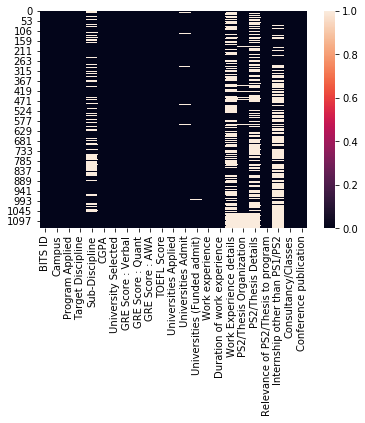

In [412]:
sns.heatmap(dataset.isnull())

In [413]:
for i in dataset.index:
    for key, value in dic_names.items():
        if( key == dataset.loc[i,'University Selected']):
            dataset.loc[i,'University Selected'] = value

In [414]:
# Assigning no, not yet type strings to NAN 
l = dataset[dataset['University Selected'] == 'notyet'].index
dataset.loc[l,'University Selected']= np.nan
l = dataset[dataset['University Selected'] == 'no'].index
dataset.loc[l,'University Selected']= np.nan
l = dataset[dataset['University Selected'] == 'noneyet'].index
dataset.loc[l,'University Selected']= np.nan
l = dataset[dataset['University Selected'] == 'none'].index
dataset.loc[l,'University Selected']= np.nan
l = dataset[dataset['University Selected'] == 'nan'].index
dataset.loc[l,'University Selected']= np.nan
l = dataset[dataset['University Selected'] == 'notsure'].index
dataset.loc[l,'University Selected']= np.nan
l = dataset[dataset['University Selected'] == '.'].index
dataset.loc[l,'University Selected']= np.nan
l = dataset[dataset['University Selected'] == ''].index
dataset.loc[l,'University Selected']= np.nan
l = dataset[dataset['University Selected'] == 'bitspilani'].index
dataset.loc[l,'University Selected']= np.nan
l = dataset[dataset['University Selected'] == 'ucfucr'].index
dataset.loc[l,'University Selected']= np.nan
l = dataset[dataset['University Selected'] == 'utdno'].index
dataset.loc[l,'University Selected']= np.nan
l = dataset[dataset['University Selected'] == 'kicselect'].index
dataset.loc[l,'University Selected']= np.nan
l = dataset[dataset['University Selected'] == 'duquesne'].index
dataset.loc[l,'University Selected']= np.nan
l = dataset[dataset['University Selected'] == 'erasmusmundus'].index
dataset.loc[l,'University Selected']= np.nan
l = dataset[dataset['University Selected'] == 'xyz'].index
dataset.loc[l,'University Selected']= np.nan


In [415]:
for j in dataset.index:
    for i in qs.index:
        if( qs.loc[i,'University Selected'] == dataset.loc[j,'University Selected']):
            dataset.loc[j,'rank'] = qs.loc[i,'rank']

In [416]:
dataset[dataset['rank'].isnull()]['University Selected'].unique()

array([nan], dtype=object)

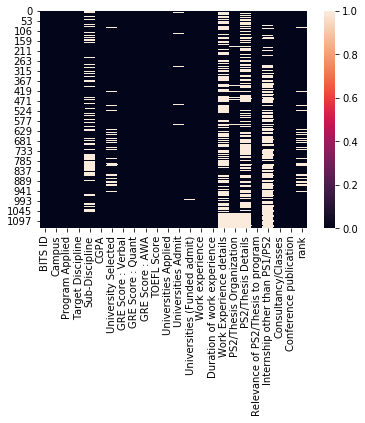

In [417]:
sns.heatmap(dataset.isnull())

Making categorical column from conference publications

In [418]:
dataset['Conference publication'].value_counts()

NO     974
Yes    156
Name: Conference publication, dtype: int64

Dealing with internship other than PS2/PS1 column

In [419]:
dataset.columns

Index(['BITS ID', 'Campus', 'Program Applied', 'Target Discipline',
       'Sub-Discipline', 'CGPA', 'University Selected', 'GRE Score : Verbal',
       'GRE Score : Quant', 'GRE Score : AWA', 'TOEFL Score',
       'Universities Applied', 'Universities Admit',
       'Universities (Funded admit)', 'Work experience',
       'Duration of work experience', 'Work Experience details',
       'PS2/Thesis Organization', 'PS2/Thesis Details',
       'Relevance of PS2/Thesis to program', 'Internship other than PS1/PS2',
       'Consultancy/Classes', 'Conference publication', 'rank'],
      dtype='object')

In [420]:
dataset['Internship other than PS1/PS2'].unique()

array(['Yes ', 'NO', 'NOne', nan, 'IIT Bombay, LV Prasad Eye Institute',
       'Brown University - Summer 2017',
       'Hyperloop india; Also several SOPs and small hobby projects.',
       'Microsoft IDC Summer Intern', 'CEERI Pilani, IIIT Bangalore',
       'Research Intern at Concordia University,Montreal',
       'Google Summer Of Code',
       'MIT Department of Materials Science (DMSE) as Research Associate, Harvard Medical School as Research Assistant, IIT Madras as Research Associate',
       'MIT Dept. Of Materials Science (0.5) and Harvard Medical School (0.5)',
       '-', 'Iisc research intern', 'NTU, Singapore', 'Intuit, Bangalore',
       'Third year summer - Intuit, Bangalore', 'IISC, Texas Instruments',
       'iisc after 2nd year', 'IISc,',
       'Summer Research Fellow at JNCASR.', 1, 'CEERI, IIIT Delhi',
       'Part-time work with Telangana Goverment as a consultant for 2',
       'Brunel University, London', 'Nanyang TechNOlogical University',
       'Greenpeace

In [421]:
result_new = find_fuzz(dataset['Internship other than PS1/PS2'].unique(), 93)
result_new

,full_name,comparison_name,similarity_score
0,Yes,Yes,100
1,Google Summer Of Code,Google Summer of Code 2014,95
2,Google Summer Of Code,Google Summer of Code,100
3,"IISc,",IISc,100
4,IISc Bangalore,"IISc, Bangalore",97
5,CEERI Pilani,"CEERI, Pilani",96
6,Google Summer of Code 2014,Google Summer of Code,95
7,IITDelhi,IIT Delhi,94
8,"TIFR, Mumbai",TIFR Mumbai,96
9,IIT Madras,"IIT, madras",95


In [422]:
for j in result_new.index:
        l = dataset[dataset['Internship other than PS1/PS2'] == result_new.loc[j,'comparison_name']].index
        dataset.loc[l, 'Internship other than PS1/PS2'] = result_new.loc[j , 'full_name']

In [423]:
dataset['Internship other than PS1/PS2'].nunique()

242

In [424]:
#preprocessing this columns
dataset['Internship other than PS1/PS2'].to_string()
dataset['Internship other than PS1/PS2'] = dataset['Internship other than PS1/PS2'].str.lower() #lowercasing
dataset['Internship other than PS1/PS2'] = dataset['Internship other than PS1/PS2'].str.replace(',',"") #removing commas
dataset['Internship other than PS1/PS2'] = dataset['Internship other than PS1/PS2'].str.replace('-',"") # 
dataset['Internship other than PS1/PS2'] = dataset['Internship other than PS1/PS2'].str.replace('@',"")
dataset['Internship other than PS1/PS2'] = dataset['Internship other than PS1/PS2'].str.replace('&',"")
replacements = {'summer':'', 
                'project':'', 'at': '','university' :'','of' : '', '1': '', 'univ': '','felloship' : '', 'programme': '','internship':'',
               'nternships':'','NOne': 'no' , 'for':'', 'none':'no'}
for i in dataset.index:
    dataset.loc[i, 'Internship other than PS1/PS2'] = str(dataset.loc[i, 'Internship other than PS1/PS2'])
    dataset.loc[i,'Internship other than PS1/PS2'] =  re.sub('|'.join(r'\b%s\b' % re.escape(str(s)) for s in replacements), 
        replace, dataset.loc[i,'Internship other than PS1/PS2']) 
for i in dataset.index:
    dataset.loc[i, 'Internship other than PS1/PS2'] = re.sub("[\(\[].*?[\)\]]", "", dataset.loc[i,'Internship other than PS1/PS2'])

dataset['Internship other than PS1/PS2']= dataset['Internship other than PS1/PS2'].str.strip()
words = []
for i in dataset.index:                # Choosing first two words in string
        words.append(dataset.loc[i, 'Internship other than PS1/PS2'].split()[:2])
        dataset.loc[i, 'Internship other than PS1/PS2'] = "\n".join(["".join(x) for x in words])
        words = []

In [425]:
#finding similarity again with lower threshold 
result_new = find_fuzz(dataset['Internship other than PS1/PS2'].unique(), 90)
result_new

,full_name,comparison_name,similarity_score
0,yes,yesal,90
1,no,ltnoida,90
2,no,internfinolex,90
3,no,indianoil,90
4,no,nokiasez,90
5,nan,nanyangtechnological,90
6,nan,nanophotonicsplasmonics,90
7,iitbombay,iitb,90
8,iiscresearch,iisc,90
9,ntusingapore,nussingapore,92


In [426]:
for j in result_new.index:
    if result_new.loc[j,'full_name'] not in ['iictmumbai', 'iicthyderabad', 'no', 'none', 'nan','termiiithyd','iitropar','asiaautomation','on']:
        l = dataset[dataset['Internship other than PS1/PS2'] == result_new.loc[j,'comparison_name']].index
        dataset.loc[l, 'Internship other than PS1/PS2'] = result_new.loc[j , 'full_name']

In [427]:
dataset['Internship other than PS1/PS2'].unique()

array(['yes', 'no', 'nan', 'iitbombay', 'brown2017', 'hyperloopindia;',
       'microsoftidc', 'ceeripilani', 'researchintern', 'googlecode',
       'mitdepartment', 'mitdept.', '', 'iiscresearch', 'ntusingapore',
       'intuitbangalore', 'thirdyear', 'iisctexas', 'iiscafter',
       'researchfellow', 'ceeriiiit', 'parttimework', 'brunellondon',
       'nanyangtechnological', 'greenpeacemumbai',
       'forschungszentrumjuelich', 'iisc', 'singaporemanagement',
       'urochester', 'iiitbangalore', 'inriafrancegoogle', 'termiiithyd',
       'indianacademy', 'nil', 'nus', 'daad', 'tudelft',
       'chennaimathematical', 'mpisws', ').zomato2).',
       'microsofthyderabad', 'freelance', 'iitkharagpur',
       'microsoftresearch', 'gsocstanford', 'vodafoneindia', '2017epfl',
       'thyssenkruppprivate', 'virginiatech', 'microsoftit',
       'mitacsglobalink', 'uscviterbi', 'volunteeran', 'yes3', 'iitropar',
       'barcrantus', 'internimperial', 'electronicsscience', 'zerolabs',
       '

In [428]:
#Finding substrings like IIT, IISC and grouping in same category 
for i in dataset.index:
    if 'iit' in dataset.loc[i,'Internship other than PS1/PS2']:
        dataset.loc[i,'Internship other than PS1/PS2'] = 'iit'
    if 'iisc' in dataset.loc[i,'Internship other than PS1/PS2']:
        dataset.loc[i,'Internship other than PS1/PS2'] = 'iisc'
    if 'google' in dataset.loc[i,'Internship other than PS1/PS2']:
        dataset.loc[i,'Internship other than PS1/PS2'] = 'gsoc'
    if 'gsoc' in dataset.loc[i,'Internship other than PS1/PS2']:
        dataset.loc[i,'Internship other than PS1/PS2'] = 'gsoc'
    if 'ceeri' in dataset.loc[i,'Internship other than PS1/PS2']:
        dataset.loc[i,'Internship other than PS1/PS2'] = 'ceeri'
    if 'iict' in dataset.loc[i,'Internship other than PS1/PS2']:
        dataset.loc[i,'Internship other than PS1/PS2'] = 'iict'
    if 'microsoft' in dataset.loc[i,'Internship other than PS1/PS2']:
        dataset.loc[i,'Internship other than PS1/PS2'] = 'microsoft'
    if 'indira' in dataset.loc[i,'Internship other than PS1/PS2']:
        dataset.loc[i,'Internship other than PS1/PS2'] = 'igcarkalpakkam'
    if 'nanyang' in dataset.loc[i,'Internship other than PS1/PS2']:
        dataset.loc[i,'Internship other than PS1/PS2'] = 'nus'
    if 'mitacs' in dataset.loc[i,'Internship other than PS1/PS2']:
        dataset.loc[i,'Internship other than PS1/PS2'] = 'mitacs'
    if 'mit' in dataset.loc[i,'Internship other than PS1/PS2']:
        dataset.loc[i,'Internship other than PS1/PS2'] = 'mit'
    if 'yes' in dataset.loc[i,'Internship other than PS1/PS2']:
        dataset.loc[i,'Internship other than PS1/PS2'] = 'yes'
    if 'no' in dataset.loc[i,'Internship other than PS1/PS2']:
        dataset.loc[i,'Internship other than PS1/PS2'] = 'no'
    if 'tifr' in dataset.loc[i,'Internship other than PS1/PS2']:
        dataset.loc[i,'Internship other than PS1/PS2'] = 'tifr'
        
 

In [429]:
#imputing fields not defined as no
l = dataset[dataset['Internship other than PS1/PS2'] == 'ghanta'].index
dataset.loc[l, 'Internship other than PS1/PS2'] = 'no'
l = dataset[dataset['Internship other than PS1/PS2'] == 'n.a'].index
dataset.loc[l, 'Internship other than PS1/PS2'] = 'no'
l = dataset[dataset['Internship other than PS1/PS2'] == 'nan'].index
dataset.loc[l, 'Internship other than PS1/PS2'] = 'no'
l = dataset[dataset['Internship other than PS1/PS2'] == 'nil'].index
dataset.loc[l, 'Internship other than PS1/PS2'] = 'no'
# imputing nan values to 'no'
dataset['Internship other than PS1/PS2'].fillna('no',inplace=True)

In [430]:
# Creating sepearte yes or no categorical column for internships
for i in dataset.index:
    if (dataset.loc[i,'Internship other than PS1/PS2'] == 'no'):
        dataset.loc[i,'Other Internship'] = 'no'
    else: 
        dataset.loc[i,'Other Internship'] = 'yes'

In [431]:
dataset['Other Internship'].value_counts()

no     795
yes    335
Name: Other Internship, dtype: int64

Dropping sparse and non-uniform columns 

In [432]:
dataset.drop(['Work Experience details','PS2/Thesis Organization', 'PS2/Thesis Details'], axis=1, inplace=True)

In [433]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [434]:
dataset.columns

Index(['BITS ID', 'Campus', 'Program Applied', 'Target Discipline',
       'Sub-Discipline', 'CGPA', 'University Selected', 'GRE Score : Verbal',
       'GRE Score : Quant', 'GRE Score : AWA', 'TOEFL Score',
       'Universities Applied', 'Universities Admit',
       'Universities (Funded admit)', 'Work experience',
       'Duration of work experience', 'Relevance of PS2/Thesis to program',
       'Internship other than PS1/PS2', 'Consultancy/Classes',
       'Conference publication', 'rank', 'Other Internship'],
      dtype='object')

In [435]:
# No selection for both university selected and admitted data as null values
l = dataset[(dataset['University Selected'].isnull()) & (dataset['Universities Admit'].isnull())].index
dataset.drop(l,inplace = True)

    

In [436]:
dataset[(dataset['University Selected'].isnull())]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,TOEFL Score,Universities Applied,Universities Admit,Universities (Funded admit),Work experience,Duration of work experience,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication,rank,Other Internship
91,2015A3TS0166G,goa,MS,Electrical and Electronics Engineering,Analog and Mixed Signal,9.310,NaN,158.000000,169.000000,4.000000,110,"Georgia Tech, Stanford University, U Californi...","Georgia Tech, U California Los Angeles, U Cali...",NO,Yes,0.5,Yes,no,NO,Yes,NaN,no
92,2015A2PS0849P,pilani,MS,Civil Engineering,Water Resources Engineering,8.350,NaN,159.000000,169.000000,4.500000,117,"Duke University, Georgia Tech, Stanford Univer...","Duke University, TU Delft, U Florida",NO,Yes,1.5,NO,yes,Yes,Yes,NaN,yes
93,2015A7PS0059P,pilani,MS,Computer Science,Scientific Computing,9.120,NaN,163.000000,169.000000,4.500000,116,"U IlliNOis Urbana Champaign, U Wisconsin Madis...","U IlliNOis Urbana Champaign, U Toronto",YES,Yes,1.5,Yes,no,NO,NO,NaN,no
102,2012A7PS066H,hyderabad,MS,Computer Science,NaN,8.060,NaN,145.000000,164.000000,3.000000,96,"Arizona State University, NOrth Carolina State...",Virginia Tech,NaN,NO,0.0,Yes,no,Yes,NO,NaN,no
328,2012B4A7662P,pilani,MS,Computer Science,Data Science,7.690,NaN,165.000000,170.000000,5.000000,115,"Carnegie Melon University, Georgia Tech, NOrth...","Georgia Tech, U Texas Austin",NO,NO,0.0,NO,yes,NO,NO,NaN,yes
386,2008C6PS609G,goa,MS,Computer Science,NaN,7.940,NaN,157.000000,164.000000,4.000000,109.089,TAMU\nNCSU\nTexas\nIrvine \nUCSB,ASU\nPenn State IST,NOne,Yes,5.0,Yes,no,Yes,NO,NaN,no
389,2012A4TS215G,goa,MS,Mechanical Engineering,Robotics,8.190,NaN,157.000000,164.000000,4.000000,113,CMU; Johns Hopkins;UMich Ann Arbor; Oregon Sta...,Johns Hopkins,NO,NO,0.0,Yes,no,NO,NO,NaN,no
392,2009C6PS549H,hyderabad,MS,Computer Science,NaN,7.400,NaN,151.000000,164.000000,3.500000,115,Arizona State University;\nNOrth Carolina Stat...,Arizona State University;\nIlliNOis Institute ...,NO,Yes,5.0,Yes,no,NO,NO,NaN,no
395,2010A8PS343G,goa,MS,Computer Science,NaN,7.980,NaN,152.000000,163.000000,3.000000,113,"ASU, Stony Brook, UTD, UCSD, Colarado, TAMU, N...",ASU\nStony Brook. UTD,NO,Yes,2.0,Yes,no,NO,NO,NaN,no
411,2012A4TS143G,goa,MS,Environmental Engineering,Sustainable Systems,8.800,NaN,155.000000,168.000000,3.500000,101,University of Michigan Ann Arbor; KTH Sweden; ...,University of Michigan Ann Arbor; KTH Sweden; ...,NO,NO,0.5,Yes,no,NO,NO,NaN,no


Dealing with Universities (Funded Admit) variable 

In [437]:
dataset['Universities (Funded admit)'].fillna('no', inplace=True)

In [440]:
l = dataset[dataset['Universities (Funded admit)'] == 'no'].index
dataset.loc[l, 'funded'] = 'no'
for i in dataset.index:
    if(dataset.loc[i,'Universities (Funded admit)'] == 'no'):
        dataset.loc[i, 'funded'] = 'no'
    else:
        dataset.loc[i, 'funded'] = 'yes'


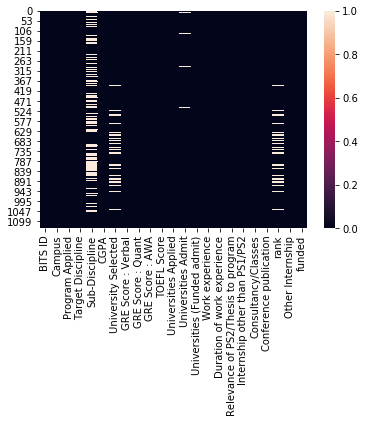

In [441]:
sns.heatmap(dataset.isnull())

In [442]:
dataset.head(5)

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,TOEFL Score,Universities Applied,Universities Admit,Universities (Funded admit),Work experience,Duration of work experience,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication,rank,Other Internship,funded
0,2015A7TS0081P,pilani,MS,Computer Science,Artificial Intelligence/ Machine Learning,7.93,arizonastate,154.0,170.0,4.0,105,"Arizona State University, Carnegie Melon Unive...",Arizona State University,NO,Yes,1.5,NO,yes,NO,Yes,209.0,yes,yes
1,2012C6PSC6598P,pilani,MS,Computer Science,NaN,6.70,arizonastate,159.0,167.0,3.5,110,"Arizona State University, SUNY Buffalo, SUNY S...","Arizona State University, SUNY Buffalo",NO,Yes,1.5,Yes,no,NO,NO,209.0,no,yes
2,2014A3PS224P,pilani,MS,Mechanical Engineering,Robotics,7.78,arizonastate,154.0,169.0,3.5,110,"Arizona State University, Georgia Tech, Johns ...","U Maryland, U Mich",NO,NO,0.0,NO,no,NO,NO,209.0,no,yes
3,2015A3PS0270P,pilani,MS,Computer Science,NaN,7.98,arizonastate,148.0,169.0,4.0,103,"Arizona State University, San Jose State Unive...","Arizona State University, SUNY Buffalo, U Flor...",NO,NO,0.5,Yes,no,NO,NO,209.0,no,yes
4,2012B1A4761P,pilani,PhD,Bioengineering,Tissue Engineering,8.40,boston,163.0,164.0,5.0,118,"Boston University, Georgia Tech, Harvard Unive...","Boston University, U Caifornia Irvine, Tufts U...",YES,Yes,1.5,Yes,yes,NO,Yes,81.0,yes,yes


In [443]:
dataset = dataset.astype(str).apply(lambda x: x.str.lower()) #Converting to lowercase

In [444]:
#dropping universities applied and admit columns
#dataset.drop(['Universities Applied','Universities Admit'], axis=1, inplace=True)

In [445]:
# exporting dataset to csv for pipelining to different notebook
dataset.to_csv('data_processed.csv' , index= False)

In [ ]:
data = pd.read_csv('data_processed.csv')